In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Inisialisasi dan latih model pohon keputusan
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Akurasi: 0.9444444444444444

Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



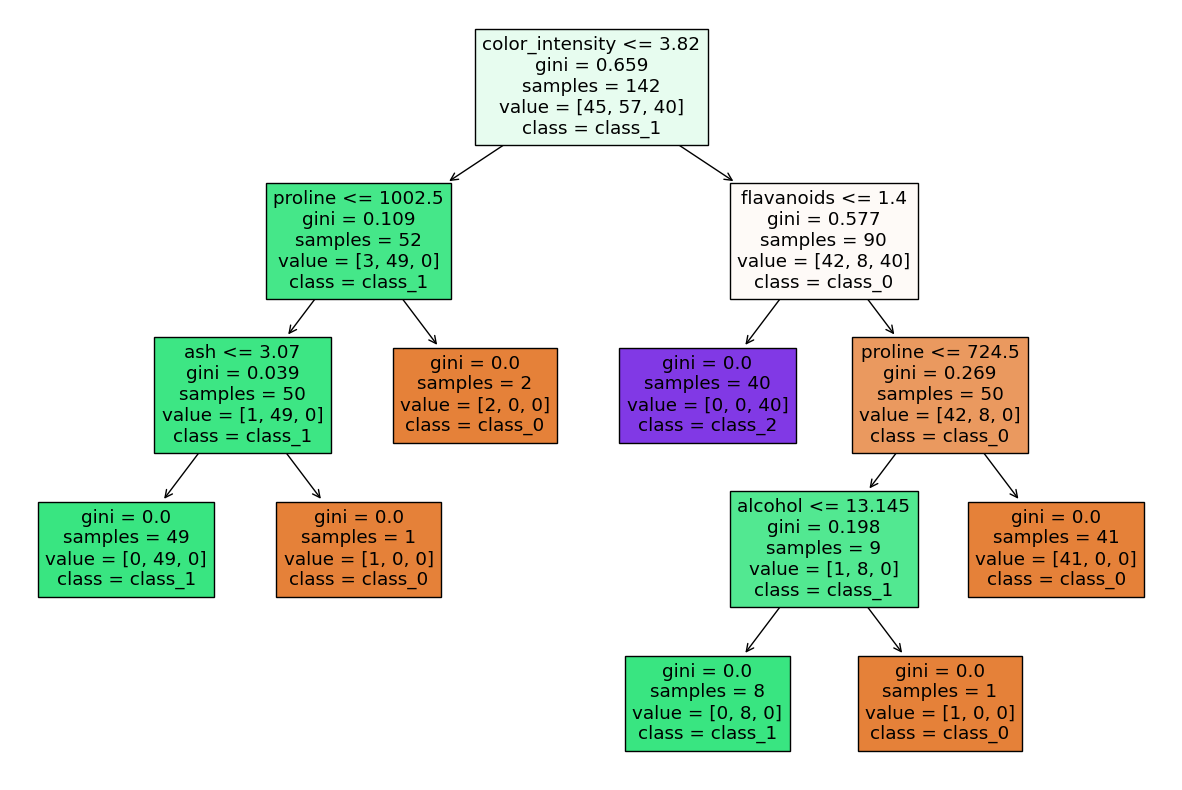

In [4]:
# Prediksi kelas untuk data uji
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()


Presisi: 1.0
Recall: 1.0
Skor F1: 1.0


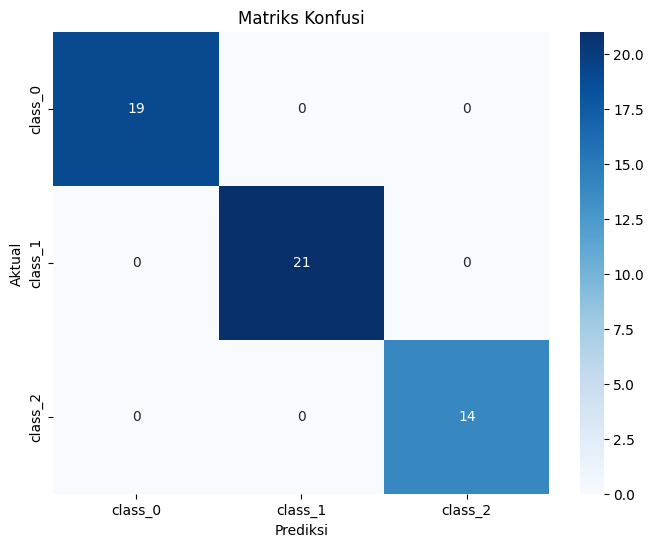

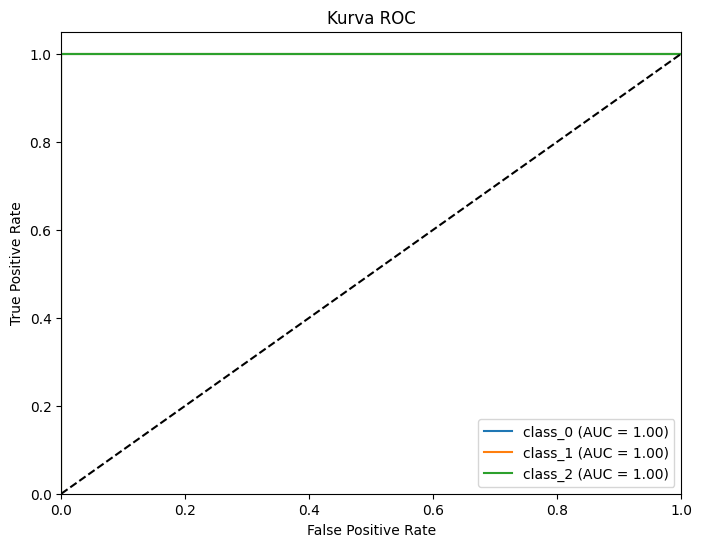

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset wine
wine = load_wine()
X = wine.data
y = wine.target

# Membagi dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Membuat prediksi
y_pred = clf.predict(X_test)

# Hitung presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi:", precision)

# Hitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Hitung skor F1
f1 = f1_score(y_test, y_pred, average='weighted')
print("Skor F1:", f1)

# Plot matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Konfusi')
plt.show()

# Plot Kurva ROC
y_prob = clf.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(wine.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(wine.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'{wine.target_names[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc="lower right")
plt.show()
